In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D
from keras import backend as K

In [24]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

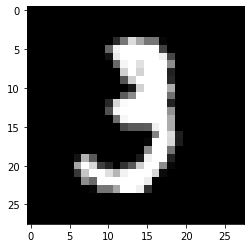

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10,:,:],'gray')
plt.show()

In [25]:
x_train=x_train.reshape(*x_train.shape,1)

In [28]:
x_test=x_test.reshape(*x_test.shape,1)

In [40]:
x_train=x_train/255
x_test=x_test/255

In [33]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [44]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),\
             metrics=['accuracy'])



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [45]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/30





60000/60000 [==============================] - 71s 1ms/step - loss: 0.2041 - acc: 0.9381 - val_loss: 0.0507 - val_acc: 0.9836
Epoch 2/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0815 - acc: 0.9760 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 3/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0632 - acc: 0.9810 - val_loss: 0.0318 - val_acc: 0.9891
Epoch 4/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0541 - acc: 0.9837 - val_loss: 0.0287 - val_acc: 0.9897
Epoch 5/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0478 - acc: 0.9858 - val_loss: 0.0268 - val_acc: 0.9902
Epoch 6/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0446 - acc: 0.9860 - val_loss: 0.0241 - val_acc: 0.9919
Epoch 7/30
60000/60000 [==

In [46]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0230810481288936
Test accuracy: 0.9932
